<a href="https://colab.research.google.com/github/dk-wei/ml-algo-implementation/blob/main/Stratified_KFold_%2B_Voting_Ensemble_%2B_Multi_Measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

这篇主要介绍 
 - Voting Ensemble (Voting Ensembles for averaging the predictions for any arbitrary models)
 - Stratified KFold
 - 多种measurement

 
 代码来源：https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [61]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

seed = 7

In [73]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.33, stratify = Y, random_state=42)

In [86]:
X.shape, Y.shape, X_test.shape, Y_test.shape

((514, 8), (514,), (254, 8), (254,))

设定多个评判标准

In [75]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [87]:
将模型一个个装入estimators这个list，还可以指定weights，最好是采用`soft` voting method

SyntaxError: ignored

In [88]:
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=seed)

# create the sub models
estimators = []

model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC(probability=True)
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators,
                            voting='soft',
                            weights=[1, 1, 1]
                            )
#results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [89]:
results = model_selection.cross_validate(estimator=ensemble,
                                          X=X,
                                          y=Y,
                                          cv=kfold,
                                          scoring=scoring
                                         )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [90]:
print(results)

{'fit_time': array([0.06760502, 0.06903887, 0.05658364, 0.05929804, 0.05727577]), 'score_time': array([0.00462246, 0.00723076, 0.00607705, 0.00439835, 0.00422049]), 'test_accuracy': array([0.70873786, 0.67961165, 0.76699029, 0.72815534, 0.78431373]), 'test_precision': array([0.59375   , 0.54285714, 0.6875    , 0.63333333, 0.76      ]), 'test_recall': array([0.52777778, 0.52777778, 0.61111111, 0.52777778, 0.54285714]), 'test_f1_score': array([0.55882353, 0.53521127, 0.64705882, 0.57575758, 0.63333333])}


In [91]:
print(results['test_accuracy'].mean())

0.7335617742242528


模型效果看到了，下一步就fit on training data，然后predict on testing data

In [92]:
ensemble.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('cart',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion...
                                        

In [93]:
pred_test = ensemble.predict_proba(X_test)
#pred_test

In [94]:
# training set

from sklearn import metrics
import plotly.express as px
import numpy as np
import pandas as pd

def check_performance(predictions, true_labels, thresholds):
    
    performances = list()
    for thresh in thresholds:
        predicted_labels = np.where(predictions[:,1] > thresh, 1, 0)
        #predicted_labels = ensemble.predict(test_vectors)
        
        metric_dict = dict()
        metric_dict['threshold'] = thresh
        #metric_dict['accuracy'] = metrics.accuracy_score(true_labels, predicted_labels)
        metric_dict['precision'] = metrics.precision_score(true_labels, predicted_labels, zero_division = 0)
        metric_dict['recall'] = metrics.recall_score(true_labels, predicted_labels)
        metric_dict['f1_score'] = metrics.f1_score(true_labels, predicted_labels)
        
        performances.append(metric_dict)
    
    perf_metrics = pd.DataFrame(performances)
    df = perf_metrics.melt(id_vars='threshold', value_vars=[
                                                            #'accuracy', 
                                                            'precision',
                                                            'recall', 
                                                            'f1_score']
                          )
    df.columns = ['threshold','metric','score']
    fig = px.line(df, x="threshold", y="score", color="metric")
    
    return perf_metrics, fig


threshold_range = [x/1000 for x in range(0,1000,5)]


perf_metrics, fig = check_performance(pred_test, Y_test, threshold_range)
fig.update_layout(
                    autosize=False,
                    width=800,
                    height=400,
                    title = 'Threshold Verfication',
                )
fig.show()


### 附: [Plot class probabilities calculated by the VotingClassifier](https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_probas.html)

Automatically created module for IPython interactive environment


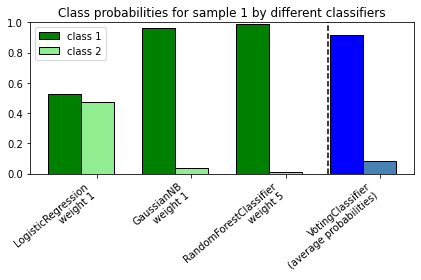

In [95]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf3 = GaussianNB()
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
y = np.array([1, 1, 2, 2])

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        voting='soft',
                        weights=[1, 1, 5])

# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()